In [1]:
from jbfg.pandas_utils  import *

In [2]:
import pandas as pd

In [4]:
schema = 'l2_jbbk_extnl'

In [5]:
sql1 = 'SELECT * FROM products_info';
sql2 = 'SELECT * FROM train_x_past';
sql3 = 'SELECT * FROM train_x_current';
sql4 = 'SELECT * FROM train_y';
sql5 = 'SELECT * FROM test_x_past';
sql6 = 'SELECT * FROM test_x_current';

In [7]:
df_products_info = get_df(sql1, schema);
df_train_x_past = get_df(sql2, schema);
df_train_x_current = get_df(sql3, schema);
df_train_y        = get_df(sql4, schema);
df_test_x_past    = get_df(sql5, schema);
df_test_x_current = get_df(sql6, schema);

In [8]:
df_products_info.columns.str.replace('products_id','product_id')

Index(['product_id', 'name', 'category_id', 'division_id', 'category_name',
       'division_name'],
      dtype='object')

In [9]:
df_products_info.head()

,product_id,name,category_id,division_id,category_name,division_name
0,21709,Sparkling Lemon Water,115,7,water seltzer sparkling water,beverages
1,20995,Organic Broccoli Florets,116,1,frozen produce,frozen
2,33000,Pure Irish Butter,36,16,butter,dairy eggs
3,7781,Organic Sticks Low Moisture Part Skim Mozzarel...,21,16,packaged cheese,dairy eggs
4,47144,Unsweetened Original Almond Breeze Almond Milk,91,16,soy lactosefree,dairy eggs


In [12]:
df_train_x_past.head()

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id
0,717029,196613,15,1,9,3.0,5,0,41220
1,2325772,196613,35,6,11,2.0,7,1,41220
2,642668,196613,69,2,16,2.0,11,1,4210
3,1326515,196613,61,3,19,3.0,3,1,4210
4,1437845,196613,36,3,15,4.0,16,0,4210


In [13]:
df_train_x_current.head()

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered
0,806422,41116,47,5,18,3.0,4,1
1,2146033,127113,45,1,10,7.0,24,1
2,3055498,140168,45,5,10,26.0,11,1
3,3267527,60604,52,0,16,8.0,2,1
4,3125992,136554,46,4,9,5.0,2,0


# 상품구매정보와 상품정보 결합

In [14]:
df_m1 = pd.merge(df_train_x_past, df_products_info, how = 'left', on ='product_id')

In [11]:
df_m1.head()

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id,name,category_id,division_id,category_name,division_name
0,717029,196613,15,1,9,3.0,5,0,41220,Organic Romaine Lettuce,83,4,fresh vegetables,produce
1,2325772,196613,35,6,11,2.0,7,1,41220,Organic Romaine Lettuce,83,4,fresh vegetables,produce
2,642668,196613,69,2,16,2.0,11,1,4210,Whole Milk,84,16,milk,dairy eggs
3,1326515,196613,61,3,19,3.0,3,1,4210,Whole Milk,84,16,milk,dairy eggs
4,1437845,196613,36,3,15,4.0,16,0,4210,Whole Milk,84,16,milk,dairy eggs


# 데이터 분포 확인

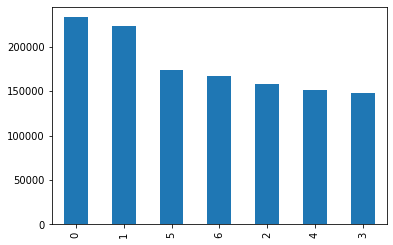

In [48]:
df_m1['week_day'].value_counts().plot(kind='bar') 


일요일이 가장 구매가 많음

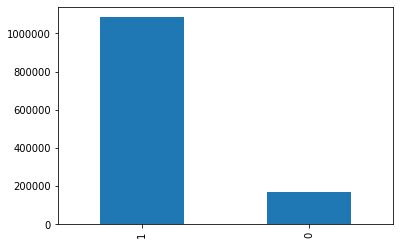

In [46]:
df_m1['is_reordered'].value_counts().plot(kind='bar')

# 결측치 확인

In [15]:
pd.isna(df_m1).sum() 

order_id          0
cstno             0
order_number      0
week_day          0
order_hour        0
order_interval    0
add_order         0
is_reordered      0
product_id        0
name              0
category_id       0
division_id       0
category_name     0
division_name     0
dtype: int64

In [33]:
df_m1['week_day'].value_counts()#sort_values(ascending=False)

0    233220
1    223454
5    173503
6    167028
2    157744
4    151015
3    148008
Name: week_day, dtype: int64

In [34]:
df_m1['is_reordered'].value_counts()#sort_values(ascending=False)

1    1083774
0     170198
Name: is_reordered, dtype: int64